In [133]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)
#stack,unstack
df1 = pd.read_csv('(행렬전환한거)이륜차신고현황_시도별_20230310142628.csv',encoding='cp949',header=1) #0,1 행이 헤더라는뜻
df1.drop('시도명(1)',axis=1,inplace=True)
#print(df1)

df2 = pd.read_csv('(행렬전환안한거)이륜차신고현황_시도별_20230310142608.csv',encoding='cp949',header=[0,1,2])
df2.drop(('시도명(1)','시도명(1)','시도명(1)'),axis=1,inplace=True)
df2.columns.names = ['시점','소유','크기']

a=df2.set_index(('시군구(1)','시군구(1)','시군구(1)'))
b = a.stack(level=0)
b.index.names=['지역','시점']
c = b.swaplevel(0,1)
d = c.stack(level=0)
e = d.reset_index()
e = e.replace('계',np.NaN).dropna()
#print(df1)
#print(df2)

In [134]:
e.insert(0,'년',e['시점'].apply(lambda x: str(x).split('.')[0]))
e.insert(1,'월',e['시점'].apply(lambda x: str(x).split('.')[1]))
e.head()

크기,년,월,시점,지역,소유,경형,대형,소계,소형,중형
4,2023,01,2023.01,강서구,관용,3,0,51,8,40
5,2023,01,2023.01,강서구,자가용,361,552,5868,1787,3168
7,2023,01,2023.01,중구,관용,0,0,89,20,69
8,2023,01,2023.01,중구,자가용,99,141,2928,658,2030
10,2023,01,2023.01,금정구,관용,5,2,79,4,68


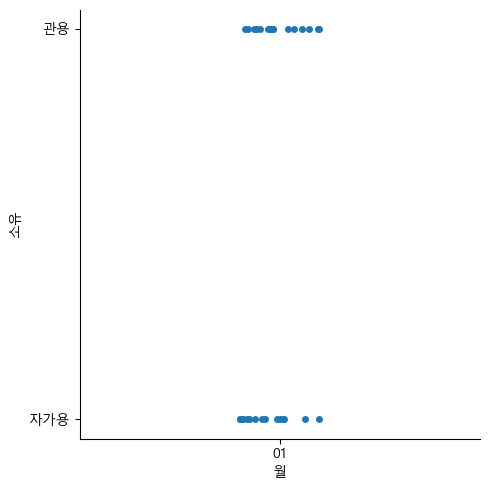

In [137]:
sns.catplot(data=e,x='월',y='소유')